In [1]:
!pip install jovian --upgrade --quiet

In [2]:
import jovian

In [3]:
jovian.commit(project='python-random-forests-assignment', privacy='secret')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sam-tafreshi/python-random-forests-assignment" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/sam-tafreshi/python-random-forests-assignment


'https://jovian.ai/sam-tafreshi/python-random-forests-assignment'

In [4]:
!pip install opendatasets scikit-learn plotly folium --upgrade --quiet

In [5]:
import os
from zipfile import ZipFile
from urllib.request import urlretrieve

dataset_url = 'https://github.com/JovianML/opendatasets/raw/master/data/house-prices-advanced-regression-techniques.zip'
urlretrieve(dataset_url, 'house-prices.zip')
with ZipFile('house-prices.zip') as f:
    f.extractall(path='house-prices')
    
os.listdir('house-prices')

['data_description.txt', 'sample_submission.csv', 'test.csv', 'train.csv']

In [6]:
import pandas as pd
pd.options.display.max_columns = 200
pd.options.display.max_rows = 200

prices_df = pd.read_csv('house-prices/train.csv')
prices_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [7]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Identify input and target columns
input_cols, target_col = prices_df.columns[1:-1], prices_df.columns[-1]
inputs_df, targets = prices_df[input_cols].copy(), prices_df[target_col].copy()

# Identify numeric and categorical columns
numeric_cols = prices_df[input_cols].select_dtypes(include=np.number).columns.tolist()
categorical_cols = prices_df[input_cols].select_dtypes(include='object').columns.tolist()

# Impute and scale numeric columns
imputer = SimpleImputer().fit(inputs_df[numeric_cols])
inputs_df[numeric_cols] = imputer.transform(inputs_df[numeric_cols])
scaler = MinMaxScaler().fit(inputs_df[numeric_cols])
inputs_df[numeric_cols] = scaler.transform(inputs_df[numeric_cols])

# One-hot encode categorical columns
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(inputs_df[categorical_cols])
encoded_cols = list(encoder.get_feature_names(categorical_cols))
inputs_df[encoded_cols] = encoder.transform(inputs_df[categorical_cols])

# Create training and validation sets
train_inputs, val_inputs, train_targets, val_targets = train_test_split(
    inputs_df[numeric_cols + encoded_cols], targets, test_size=0.25, random_state=42)

C:\Users\samta\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\samta\anaconda3\lib\site-packages\pandas\core\frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)


In [8]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sam-tafreshi/python-random-forests-assignment" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/sam-tafreshi/python-random-forests-assignment


'https://jovian.ai/sam-tafreshi/python-random-forests-assignment'

## Decision Tree

> **QUESTION 1**: Train a decision tree regressor using the training set.

In [9]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
?DecisionTreeRegressor

In [58]:
tree= DecisionTreeRegressor(random_state= 10, max_depth=4)

# tree.fit(train_inputs,train_targets)

In [59]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sam-tafreshi/python-random-forests-assignment" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/sam-tafreshi/python-random-forests-assignment


'https://jovian.ai/sam-tafreshi/python-random-forests-assignment'

QUESTION 2: Generate predictions on the training and validation sets using the trained decision tree, and compute the RMSE loss.

In [69]:
tree.fit(train_inputs, train_targets)

DecisionTreeRegressor(max_depth=4, random_state=10)

In [70]:
from sklearn.metrics import mean_squared_error

In [71]:
tree_train_preds= tree.predict(train_inputs)

In [72]:
tree_train_preds

array([200897.55757576, 145488.91463415, 112616.58536585, ...,
       112616.58536585, 155810.4137931 , 200897.55757576])

In [73]:
tree_train_rmse= mean_squared_error(train_targets,tree_train_preds,squared=False)

In [74]:
tree_train_rmse

34260.14339340371

In [75]:
tree_val_preds=tree.predict(val_inputs)

In [76]:
tree_val_preds

array([145488.91463415, 367162.84210526, 145488.91463415, 180793.46405229,
       379447.33333333, 112616.58536585, 200897.55757576, 180793.46405229,
       112616.58536585, 146125.84070796, 155810.4137931 , 112616.58536585,
       112616.58536585, 200897.55757576, 146125.84070796, 145488.91463415,
       200897.55757576, 145488.91463415, 145488.91463415, 200897.55757576,
       146125.84070796, 231320.98181818, 146125.84070796, 112616.58536585,
       200897.55757576, 145488.91463415, 200897.55757576, 112616.58536585,
       146125.84070796, 200897.55757576, 112616.58536585, 230417.70833333,
       146125.84070796, 112616.58536585, 231320.98181818, 145488.91463415,
       146125.84070796, 200897.55757576, 285352.10714286, 112616.58536585,
       112616.58536585, 230417.70833333, 112616.58536585, 367162.84210526,
       145488.91463415, 146125.84070796, 112616.58536585, 112616.58536585,
       379447.33333333, 180793.46405229, 112616.58536585, 180793.46405229,
       112616.58536585, 3

In [77]:
tree_val_rmse = mean_squared_error(val_targets, tree_val_preds, squared=False )

In [78]:
tree_val_rmse 

37855.7299489529

In [79]:
print('Train RMSE: {}, Validation RMSE: {}'.format(tree_train_rmse, tree_val_rmse))

Train RMSE: 34260.14339340371, Validation RMSE: 37855.7299489529


In [80]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sam-tafreshi/python-random-forests-assignment" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/sam-tafreshi/python-random-forests-assignment


'https://jovian.ai/sam-tafreshi/python-random-forests-assignment'

QUESTION 3: Visualize the decision tree (graphically and textually) and display feature importances as a graph. Limit the maximum depth of graphical visualization to 3 levels.

In [81]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

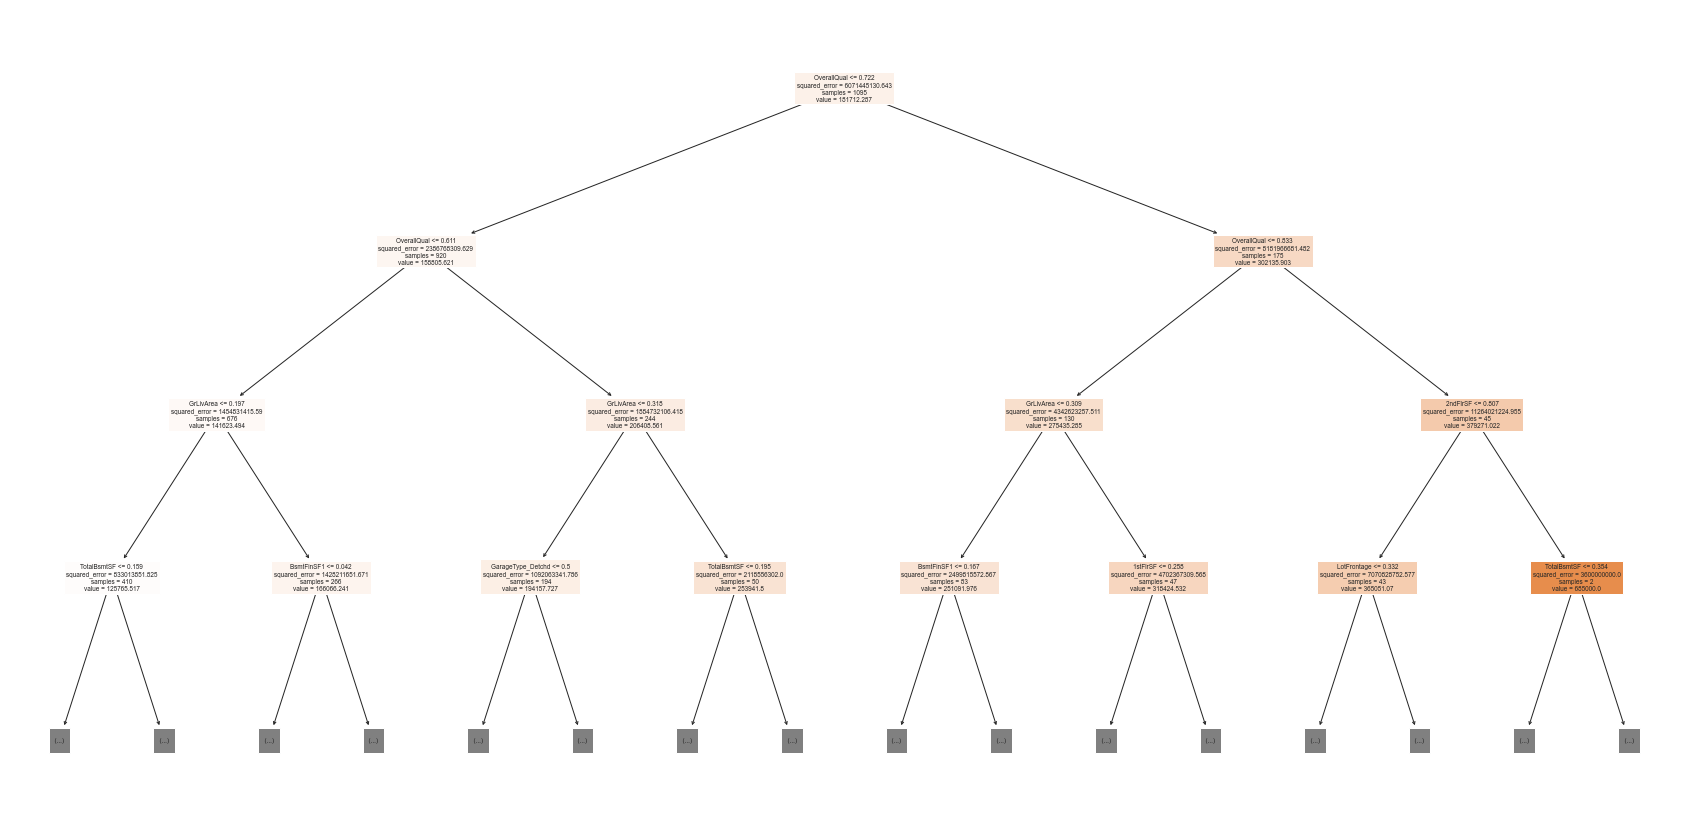

In [82]:
# Visualize the tree graphically using plot_tree
plt.figure(figsize=(30,15))
plot_tree(tree, feature_names=train_inputs.columns, max_depth=3, filled=True);

In [85]:
tree.tree_.max_depth

4

In [86]:
# Visualize the tree textually using export_text
tree_text = export_text(tree, max_depth=3, feature_names=list(train_inputs.columns))
print(tree_text[:2000])

|--- OverallQual <= 0.72
|   |--- OverallQual <= 0.61
|   |   |--- GrLivArea <= 0.20
|   |   |   |--- TotalBsmtSF <= 0.16
|   |   |   |   |--- value: [112616.59]
|   |   |   |--- TotalBsmtSF >  0.16
|   |   |   |   |--- value: [145488.91]
|   |   |--- GrLivArea >  0.20
|   |   |   |--- BsmtFinSF1 <= 0.04
|   |   |   |   |--- value: [146125.84]
|   |   |   |--- BsmtFinSF1 >  0.04
|   |   |   |   |--- value: [180793.46]
|   |--- OverallQual >  0.61
|   |   |--- GrLivArea <= 0.32
|   |   |   |--- GarageType_Detchd <= 0.50
|   |   |   |   |--- value: [200897.56]
|   |   |   |--- GarageType_Detchd >  0.50
|   |   |   |   |--- value: [155810.41]
|   |   |--- GrLivArea >  0.32
|   |   |   |--- TotalBsmtSF <= 0.19
|   |   |   |   |--- value: [230417.71]
|   |   |   |--- TotalBsmtSF >  0.19
|   |   |   |   |--- value: [275656.35]
|--- OverallQual >  0.72
|   |--- OverallQual <= 0.83
|   |   |--- GrLivArea <= 0.31
|   |   |   |--- BsmtFinSF1 <= 0.17
|   |   |   |   |--- value: [231320.98]
|   | 

In [87]:
tree.tree_.max_depth

4

In [88]:
# Display the first few lines
print(tree_text[:2000])

|--- OverallQual <= 0.72
|   |--- OverallQual <= 0.61
|   |   |--- GrLivArea <= 0.20
|   |   |   |--- TotalBsmtSF <= 0.16
|   |   |   |   |--- value: [112616.59]
|   |   |   |--- TotalBsmtSF >  0.16
|   |   |   |   |--- value: [145488.91]
|   |   |--- GrLivArea >  0.20
|   |   |   |--- BsmtFinSF1 <= 0.04
|   |   |   |   |--- value: [146125.84]
|   |   |   |--- BsmtFinSF1 >  0.04
|   |   |   |   |--- value: [180793.46]
|   |--- OverallQual >  0.61
|   |   |--- GrLivArea <= 0.32
|   |   |   |--- GarageType_Detchd <= 0.50
|   |   |   |   |--- value: [200897.56]
|   |   |   |--- GarageType_Detchd >  0.50
|   |   |   |   |--- value: [155810.41]
|   |   |--- GrLivArea >  0.32
|   |   |   |--- TotalBsmtSF <= 0.19
|   |   |   |   |--- value: [230417.71]
|   |   |   |--- TotalBsmtSF >  0.19
|   |   |   |   |--- value: [275656.35]
|--- OverallQual >  0.72
|   |--- OverallQual <= 0.83
|   |   |--- GrLivArea <= 0.31
|   |   |   |--- BsmtFinSF1 <= 0.17
|   |   |   |   |--- value: [231320.98]
|   | 

In [89]:
# Check feature importance
tree_importances=tree.feature_importances_

In [90]:
tree_importances

array([0.        , 0.01620196, 0.        , 0.77074294, 0.        ,
       0.        , 0.        , 0.        , 0.02644892, 0.        ,
       0.        , 0.02593169, 0.01412632, 0.03647893, 0.        ,
       0.10071991, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [91]:
tree_importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': tree_importances
}).sort_values('importance', ascending=False)

In [92]:
tree_importance_df

,feature,importance
3,OverallQual,0.770743
15,GrLivArea,0.100720
13,2ndFlrSF,0.036479
8,BsmtFinSF1,0.026449
11,TotalBsmtSF,0.025932
...,...,...
105,Condition2_RRNn,0.000000
104,Condition2_RRAn,0.000000
103,Condition2_RRAe,0.000000
102,Condition2_PosN,0.000000


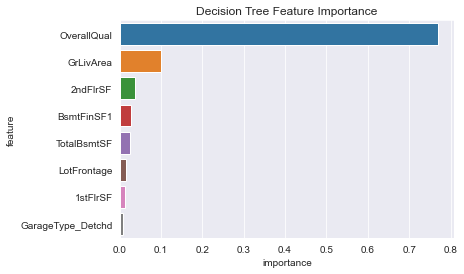

In [96]:
plt.title('Decision Tree Feature Importance')
sns.barplot(data=tree_importance_df.head(8), x='importance', y='feature');

In [94]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sam-tafreshi/python-random-forests-assignment" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/sam-tafreshi/python-random-forests-assignment


'https://jovian.ai/sam-tafreshi/python-random-forests-assignment'

## Random Forests


> **QUESTION 4**: Train a random forest regressor using the training set.

In [95]:
from sklearn.ensemble import RandomForestRegressor

In [97]:
?RandomForestRegressor

In [209]:
# Create the model
rf1 =RandomForestRegressor(
    n_estimators=100,
    max_depth=5,
    bootstrap=False,
    n_jobs=-1)

In [210]:
# Fit the model
rf1.fit(train_inputs, train_targets)

RandomForestRegressor(bootstrap=False, max_depth=5, n_jobs=-1)

In [211]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sam-tafreshi/python-random-forests-assignment" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/sam-tafreshi/python-random-forests-assignment


'https://jovian.ai/sam-tafreshi/python-random-forests-assignment'

> **QUESTION 5**: Make predictions using the random forest regressor.

In [212]:
rf1_train_preds= rf1.predict(train_inputs)

In [213]:
rf1_train_preds

array([180236.72      , 147456.21518987, 120735.8045977 , ...,
       120735.8045977 , 160264.08      , 180236.72      ])

In [214]:
rf1_train_rmse=  mean_squared_error(train_targets,rf1_train_preds,squared=False)

In [215]:
rf1_val_preds=rf1.predict(val_inputs)

In [216]:
rf1_val_preds

array([147456.21518987, 434478.33333333, 147456.21518987, 170819.30693069,
       344925.        ,  92995.13888889, 209880.53043478, 170819.30693069,
        92995.13888889, 129155.32727273, 160264.08      , 120735.8045977 ,
        92995.13888889, 180236.72      , 162218.56896552, 147456.21518987,
       209880.53043478, 147456.21518987, 147456.21518987, 209880.53043478,
       129155.32727273, 253674.52      , 162218.56896552, 120735.8045977 ,
       209880.53043478, 147456.21518987, 209880.53043478,  92995.13888889,
       162218.56896552, 209880.53043478, 120735.8045977 , 240343.42105263,
       129155.32727273,  92995.13888889, 253674.52      , 147456.21518987,
       129155.32727273, 209880.53043478, 281238.05407407, 120735.8045977 ,
       120735.8045977 , 240343.42105263, 120735.8045977 , 336094.15384615,
       147456.21518987, 162218.56896552, 120735.8045977 , 120735.8045977 ,
       434683.06666667, 170819.30693069, 120735.8045977 , 170819.30693069,
       120735.8045977 , 4

In [217]:
rf1_val_rmse=  mean_squared_error(val_targets,rf1_val_preds,squared=False)

In [218]:
print('Train RMSE: {}, Validation RMSE: {}'.format(rf1_train_rmse, rf1_val_rmse))

Train RMSE: 28571.711106929328, Validation RMSE: 37870.78087146882


In [219]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sam-tafreshi/python-random-forests-assignment" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/sam-tafreshi/python-random-forests-assignment


'https://jovian.ai/sam-tafreshi/python-random-forests-assignment'

## Hyperparameter Tuning

Let us now tune the hyperparameters of our model. You can find the hyperparameters for `RandomForestRegressor` here: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

<img src="https://i.imgur.com/EJCrSZw.png" width="480">

Hyperparameters are use

Let's define a helper function `test_params` which can test the given value of one or more hyperparameters.

In [220]:
def test_params(**params):
    model = RandomForestRegressor(random_state=42, n_jobs=-1,  **params).fit(train_inputs, train_targets)
    train_rmse = mean_squared_error(model.predict(train_inputs), train_targets, squared=False)
    val_rmse = mean_squared_error(model.predict(val_inputs), val_targets, squared=False)
    return train_rmse, val_rmse

It can be used as follows:

In [221]:
test_params(n_estimators=20, max_depth=20)

(13776.89957127333, 28886.033523273858)

In [222]:
test_params(n_estimators=50, max_depth=10, min_samples_leaf= 4, max_features=0.4)

(20490.359632429263, 29804.93164279161)

Let's also define a helper function to test and plot different values of a single parameter.

In [223]:
def test_param_and_plot(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_rmse, val_rmse = test_params(**params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

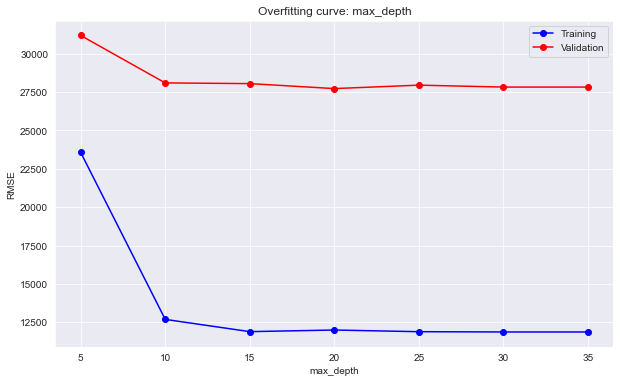

In [224]:
test_param_and_plot('max_depth', [5, 10, 15, 20, 25, 30, 35])

From the above graph, it appears that the best value for max_depth is around 20, beyond which the model starts to overfit.

In [225]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sam-tafreshi/python-random-forests-assignment" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/sam-tafreshi/python-random-forests-assignment


'https://jovian.ai/sam-tafreshi/python-random-forests-assignment'

QUESTION 6: Use the test_params and test_param_and_plot functions to experiment with different values of the hyperparmeters like n_estimators, max_depth, min_samples_split, min_samples_leaf, min_weight_fraction_leaf, max_features, max_leaf_nodes, min_impurity_decrease, min_impurity_split etc. You can learn more about the hyperparameters here: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

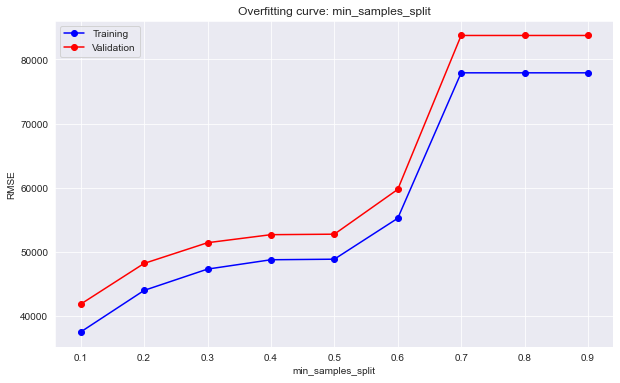

In [226]:
# min_samples_split
test_param_and_plot('min_samples_split', [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

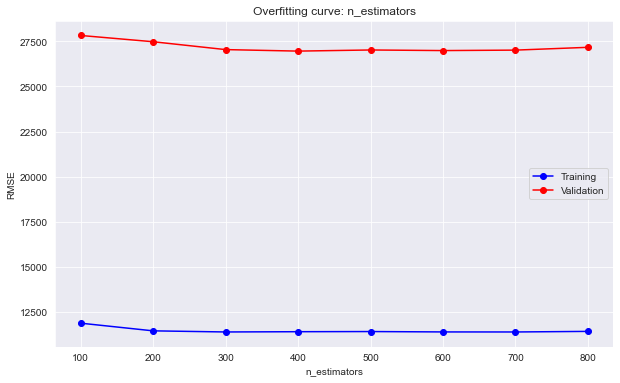

In [227]:
#n_estimators
test_param_and_plot('n_estimators', [100, 200, 300, 400, 500, 600, 700, 800])

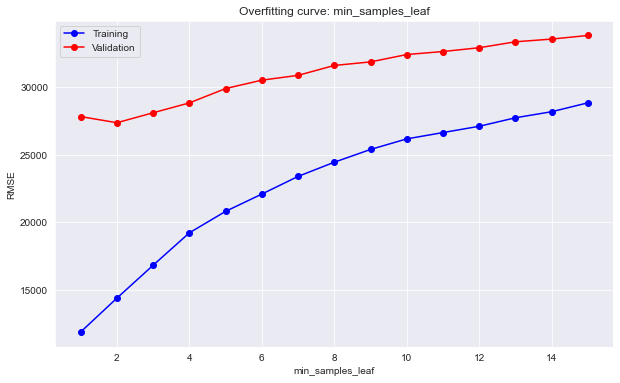

In [228]:
#min_samples_leaf
test_param_and_plot('min_samples_leaf', [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,12,13,14,15])

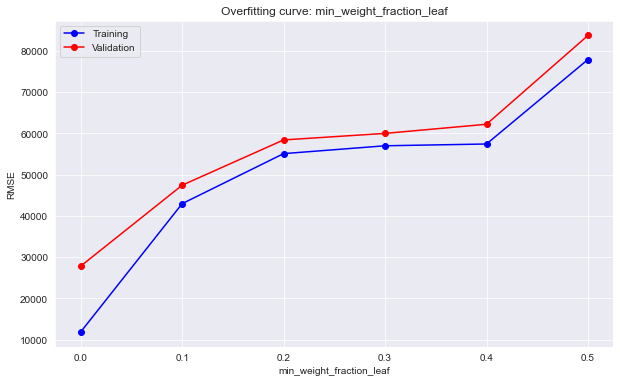

In [229]:
#min_weight_fraction_leaf
test_param_and_plot('min_weight_fraction_leaf', [0.0, 0.1, 0.2, 0.3, 0.4, 0.5])

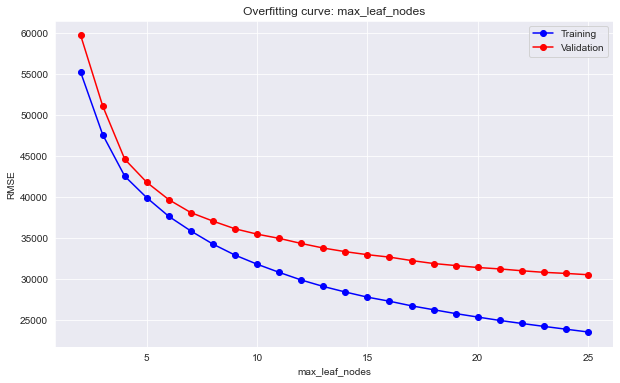

In [230]:
# max_leaf_nodes
test_param_and_plot('max_leaf_nodes', [ 2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25])

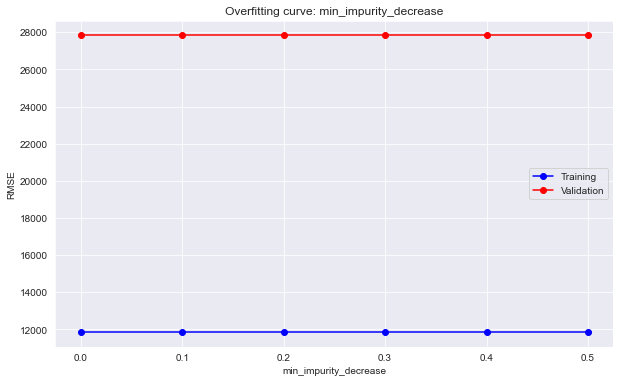

In [231]:
#min_impurity_decrease,
test_param_and_plot('min_impurity_decrease', [0.0, 0.1, 0.2, 0.3, 0.4, 0.5])

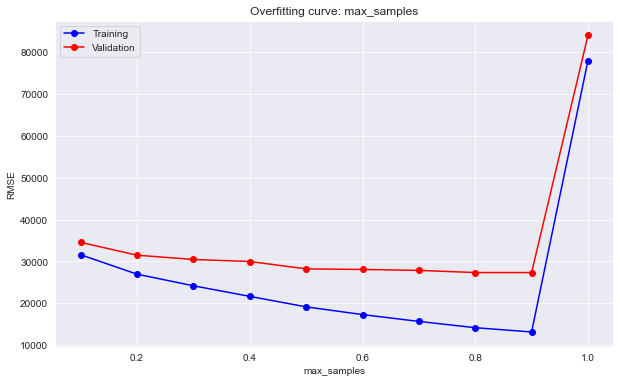

In [232]:
#max_samples
test_param_and_plot('max_samples', [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

In [233]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sam-tafreshi/python-random-forests-assignment" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/sam-tafreshi/python-random-forests-assignment


'https://jovian.ai/sam-tafreshi/python-random-forests-assignment'

In [175]:
?RandomForestRegressor

In [479]:
rf2= RandomForestRegressor(
    random_state=42,
    warm_start=False,
    ccp_alpha=0.1,
    max_samples=0.2,
    n_estimators=100,
    max_depth=4,
    bootstrap=False,
    n_jobs=-1)

In [480]:
rf2.fit(train_inputs, train_targets)

RandomForestRegressor(bootstrap=False, ccp_alpha=0.1, max_depth=4,
                      max_samples=0.2, n_jobs=-1, random_state=42)

In [481]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sam-tafreshi/python-random-forests-assignment" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/sam-tafreshi/python-random-forests-assignment


'https://jovian.ai/sam-tafreshi/python-random-forests-assignment'

In [482]:
rf2_train_preds= rf2.predict(train_inputs)

In [483]:
rf2_train_preds

array([200897.55757576, 145488.91463415, 112616.58536585, ...,
       112616.58536585, 155810.4137931 , 200897.55757576])

In [484]:
rf2_train_rmse=mean_squared_error(rf2_train_preds,train_targets, squared=False)

In [485]:
rf2_train_rmse

34260.14339340371

In [486]:
rf2_val_preds =rf2.predict(val_inputs)

In [487]:
rf2_val_rmse=mean_squared_error(rf2_val_preds,val_targets, squared=False)

In [488]:
print('Train RMSE: {}, Validation RMSE: {}'.format(rf2_train_rmse, rf2_val_rmse))

Train RMSE: 34260.14339340371, Validation RMSE: 38087.6489468281


Let's also view and plot the feature importances.

In [489]:
rf2_importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': rf2.feature_importances_
}).sort_values('importance', ascending=False)

In [490]:
rf2_importance_df

,feature,importance
3,OverallQual,0.770743
15,GrLivArea,0.100747
13,2ndFlrSF,0.036559
8,BsmtFinSF1,0.026489
11,TotalBsmtSF,0.024643
...,...,...
118,HouseStyle_SLvl,0.000000
119,RoofStyle_Flat,0.000000
120,RoofStyle_Gable,0.000000
121,RoofStyle_Gambrel,0.000000


<AxesSubplot:xlabel='importance', ylabel='feature'>

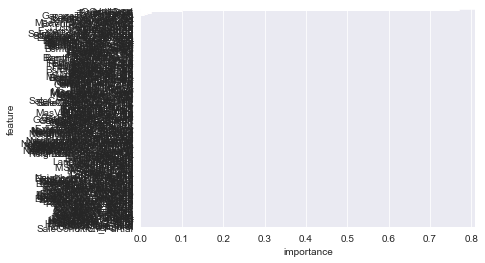

In [491]:
sns.barplot(data=rf2_importance_df, x='importance', y='feature')

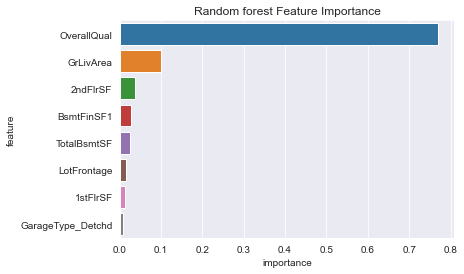

In [493]:
plt.title('Random forest Feature Importance')
sns.barplot(data=rf2_importance_df.head(8), x='importance', y='feature');

In [494]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sam-tafreshi/python-random-forests-assignment" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/sam-tafreshi/python-random-forests-assignment


'https://jovian.ai/sam-tafreshi/python-random-forests-assignment'

## Make a Submission

To make a submission, just execute the following cell:

In [495]:
jovian.submit('zerotogbms-a2')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sam-tafreshi/python-random-forests-assignment" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/sam-tafreshi/python-random-forests-assignment
[jovian] Submitting assignment..
[jovian] Verify your submission at https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms/assignment/assignment-2-decision-trees-and-random-forests
